# 1. Plot number of matchings

In [1]:
import pandas as pd
import numpy as np

## 1.1 Plot madre

In [ ]:
main = "../../data/{}"
# 11-MADRES of the 100k sample can be found on the cluster
data_madres = pd.read_csv(main.format('11-MADRES_matched_by_name.tsv'), sep='\t', header=None)
data_madres.head()


In [91]:
data_madres[1] = data_madres[1].fillna(0)
data_madres.head()

,0,1
0,0cff3028984b6357,0
1,62a938f79753ec31,0
2,968dfe177bd978dd,875042558f089b39;c4a7b4434a6079ca;c82b4178cb02...
3,61acaca6218b21c3,0
4,b6a9f701d4b5c787,0


In [92]:
for i in range(len(data_madres)):
    matching = data_madres.iloc[i, 1]
    if matching != 0:
        if matching.startswith('Found'):
            lowest = matching.find(' ')
            highest = matching.rfind(' ')
            options = matching[lowest+1:highest]
            data_madres.iloc[i, 1] = int(options)
        elif not matching.startswith('PAPAS:'):
            number_point_comma = matching.count(";")
            data_madres.iloc[i, 1] = number_point_comma + 1    

In [93]:
data_madres[1] = pd.to_numeric(data_madres[1], errors="coerce")

data_madres.dropna(how="any", inplace=True)

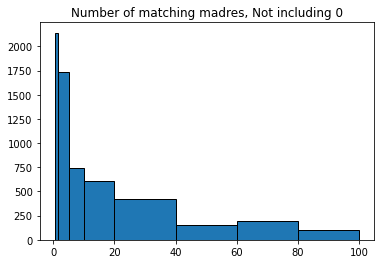

In [96]:
import matplotlib.pyplot as plt

# Including 0
# plt.hist(data_madres[1], edgecolor='black',
#          bins=[-0.5, 0.5, 1.5, 5, 10, 20, 40, 60, 80, 100])
# plt.title('Number of matching madres, Including 0')
# plt.savefig(main.format("plots/num_matchs_madres_with_0"), dpi = 200)

# Not including 0
plt.hist(data_madres[1], edgecolor='black',
         bins=[0.5, 1.5, 5, 10, 20, 40, 60, 80, 100])
plt.title('Number of matching madres, Not including 0')
plt.savefig(main.format("plots/num_matchs_madres_without_0"), dpi=200)

## 1.2 Plot padre

In [97]:
import pandas as pd
import numpy as np

main = "../../data/{}"
# 12-PADRES of the 100k sample can be found on the cluster
data_padres = pd.read_csv(main.format('12-PADRES_matched_by_name.tsv'), sep='\t', header=None)
data_padres.head()


,0,1
0,f757dbdd4dd54570,476e1301aeabff8e;2b3facbfe3bfb1b2;f161e4b4845b...
1,809bec9252e048e0,0af7e459286a1ac1;07489b6d5e02ff6a;df62db1b7da1...
2,6560f46f2718aff2,cbabdca9f20ce3fb;b19356aef39d82ab;18d7be786f6a...
3,0631e8fee598abbe,NaN
4,3e3a9de84f448790,NaN


In [98]:
data_padres[1] = data_padres[1].fillna(0)
data_padres.head()

,0,1
0,f757dbdd4dd54570,476e1301aeabff8e;2b3facbfe3bfb1b2;f161e4b4845b...
1,809bec9252e048e0,0af7e459286a1ac1;07489b6d5e02ff6a;df62db1b7da1...
2,6560f46f2718aff2,cbabdca9f20ce3fb;b19356aef39d82ab;18d7be786f6a...
3,0631e8fee598abbe,0
4,3e3a9de84f448790,0


In [99]:
for i in range(len(data_padres)):
    matching = data_padres.iloc[i, 1]
    if matching != 0:
        if matching.startswith('Found'):
            lowest = matching.find(' ')
            highest = matching.rfind(' ')
            options = matching[lowest+1:highest]
            data_padres.iloc[i, 1] = int(options)
        elif not matching.startswith('MAMAS:'):
            number_point_comma = matching.count(";")
            data_padres.iloc[i, 1] = number_point_comma + 1

In [100]:
data_padres[1] = pd.to_numeric(data_padres[1], errors="coerce")
data_padres.dropna(how="any", inplace=True)

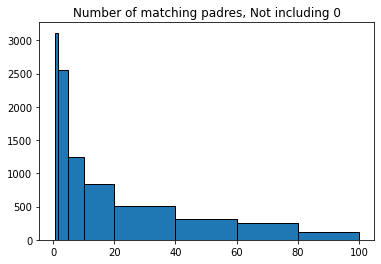

In [102]:
import matplotlib.pyplot as plt

# Including 0
# plt.hist(data_padres[1], edgecolor='black',
#          bins=[-0.5, 0.5, 1.5, 5, 10, 20, 40, 60, 80, 100])
# plt.title('Number of matching padres, Including 0')
# plt.savefig(main.format("plots/num_matchs_padres_with_0"), dpi = 200)

# Not including 0
plt.hist(data_padres[1], edgecolor='black',
         bins=[0.5, 1.5, 5, 10, 20, 40, 60, 80, 100])
plt.title('Number of matching padres, Not including 0')
plt.savefig(main.format("plots/num_matchs_padres_without_0"), dpi=200)


# 2. By year missing values

### 2.1 By year missing values - Aggregate

In [43]:
import pandas as pd
import numpy as np

main = "../../data/{}"
# 100k sample can be found on the cluster
data_sample = pd.read_csv(main.format(
    'sample_100k.tsv'), sep='\t', encoding='utf-8',
    parse_dates= ['dt_birth', 'dt_death', 'dt_marriage'], 
    dtype={'cedula': str, 'nombre': str, 'gender': 'category',
           'marital_status': 'category', 'place_birth': str,
           'nombre_spouse': str, 'nombre_padre': str, 'nombre_madre': str,
           'ced_spouse': str, 'ced_padre': str, 'ced_madre': str,
           'is_nat': bool, 'is_nat_padre': bool, 'is_nat_madre': bool
           },
    na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a',
                                      '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', ],
    keep_default_na=False,
    nrows=None,)
data_sample.head()


,Unnamed: 0,cedula,nombre,gender,dt_birth,nombre_spouse,dt_death,marital_status,place_birth,nombre_padre,nombre_madre,ced_spouse,ced_padre,ced_madre,is_nat,is_nat_padre,is_nat_madre,dt_marriage
0,1365682,0fd44894c3f63d6e,SACA MARIA INES,F,1948-01-05,,NaT,SOLTERO,181354065.0,********************,SACA MARIA,,,,True,False,True,NaT
1,1720373,6a15407ac311f0c0,MENDOZA MUÑIZ FRANCISCA CATALINA,F,1958-09-18,,NaT,SOLTERO,94155100.0,MENDOZA LUIS,MUÑIZ LUCILA,,,,True,True,True,NaT
2,20803823,c798e55e47ec09f8,QUISHPE CADENA ANDREA FIORELLA,F,2020-03-14,,NaT,SOLTERO,170607155.0,QUISHPE SANGUÑA RICHARD JAVIER,CADENA SIGUENCIA LAZZME ANDREA,,90e73065c8d4d413,bf9b167a4940ceba,True,True,True,NaT
3,6551572,033e20939743bb60,ANTE CHALUISA ANA PIEDAD,F,1979-01-29,CUSCO C JOSE XAVIER,NaT,CASADO,51054365.0,ANTE RICARDO,CHALUISA ROSA MARIA,2bd4a6e5b07fdee7,,0a4f39a13b088149,True,True,True,2003-02-27
4,13047693,66eb468686308e83,SANCHEZ ALARCON JOEL GONZALO,M,1998-05-24,,NaT,SOLTERO,170605935.0,SANCHEZ SANCHEZ SEGUNDO GONZALO,ALARCON MESTANZA MERCEDES SOLEDAD,,10881cf09e3f820a,d76512eaff17c13a,True,True,True,NaT


In [ ]:
# date filter - when to use?
# data_sample = data_sample[data_sample['dt_birth'] > np.datetime64('1930-01-01 00:00:00')]
# print('despues',100000-len(data_sample))
data_sample['year'] = pd.DatetimeIndex(data_sample['dt_birth']).year

In [18]:
# data_sample.groupby('year').count()
data_sample['ced_padre'] = data_sample['ced_padre'].replace('', np.nan)
data_sample['ced_madre'] = data_sample['ced_madre'].replace('', np.nan)
num_nan_data_sample = data_sample.set_index('year').isna().groupby(level=0).sum()
num_nan_data_sample.to_csv(main.format("intento.csv"))

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(num_nan_data_sample.index.values, num_nan_data_sample['ced_padre'].values)
plt.title("Missing ced_padre - Aggregate by year")
plt.savefig(main.format('plots/missing_ced_padre_aggregate_by_year'))

In [ ]:
plt.scatter(num_nan_data_sample.index.values,
            num_nan_data_sample['ced_madre'].values)
plt.title("Missing ced_madre - Aggregate by year")
plt.savefig(main.format('plots/missing_ced_madre_aggregate_by_year'))

### 2.2 By year missing values - Proportion

In [1]:
import pandas as pd
import numpy as np

main = "../../data/{}"
data_sample = pd.read_csv(main.format(
    'sample_100k.tsv'), sep='\t', encoding='utf-8',
    parse_dates=['dt_birth', 'dt_death', 'dt_marriage'],
    dtype={'cedula': str, 'nombre': str, 'gender': 'category',
           'marital_status': 'category', 'place_birth': str,
           'nombre_spouse': str, 'nombre_padre': str, 'nombre_madre': str,
           'ced_spouse': str, 'ced_padre': str, 'ced_madre': str,
           'is_nat': bool, 'is_nat_padre': bool, 'is_nat_madre': bool
           },
    na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a',
               '<NA>', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', ],
    keep_default_na=False,
    nrows=None,)
# data_sample.head()


In [3]:
# date filter - when to use?
# data_sample = data_sample[data_sample['dt_birth'] > np.datetime64('1930-01-01 00:00:00')]
data_sample['year'] = pd.DatetimeIndex(data_sample['dt_birth']).year


In [6]:
# data_sample.groupby('year').count()
data_sample['ced_padre'] = data_sample['ced_padre'].replace('', np.nan)
data_sample['ced_madre'] = data_sample['ced_madre'].replace('', np.nan)
num_nan_data_sample = data_sample.set_index('year').isna().groupby(level=0).mean()
num_nan_data_sample

,Unnamed: 0,cedula,nombre,gender,dt_birth,nombre_spouse,dt_death,marital_status,place_birth,nombre_padre,nombre_madre,ced_spouse,ced_padre,ced_madre,is_nat,is_nat_padre,is_nat_madre,dt_marriage
year,,,,,,,,,,,,,,,,,,
1839,False,0.0,0.0,False,0.0,0.0,0.000000,False,0.0,0.0,0.0,0.0,1.000000,1.000000,False,False,False,1.0
1880,False,0.0,0.0,False,0.0,0.0,1.000000,False,0.0,0.0,0.0,0.0,1.000000,1.000000,False,False,False,1.0
1881,False,0.0,0.0,False,0.0,0.0,0.500000,False,0.0,0.0,0.0,0.0,1.000000,1.000000,False,False,False,1.0
1882,False,0.0,0.0,False,0.0,0.0,0.000000,False,0.0,0.0,0.0,0.0,1.000000,1.000000,False,False,False,1.0
1883,False,0.0,0.0,False,0.0,0.0,1.000000,False,0.0,0.0,0.0,0.0,1.000000,1.000000,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,False,0.0,0.0,False,0.0,0.0,0.987078,False,0.0,0.0,0.0,0.0,0.098349,0.041637,False,False,False,1.0
2018,False,0.0,0.0,False,0.0,0.0,0.983676,False,0.0,0.0,0.0,0.0,0.089425,0.032647,False,False,False,1.0
2019,False,0.0,0.0,False,0.0,0.0,0.988915,False,0.0,0.0,0.0,0.0,0.095804,0.059382,False,False,False,1.0


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(num_nan_data_sample.index.values, num_nan_data_sample['ced_padre'].values)
plt.title("Missing ced_padre - Proportion by year")
plt.savefig(main.format('plots/missing_ced_padre_proportion_by_year'))

In [ ]:
plt.scatter(num_nan_data_sample.index.values,
            num_nan_data_sample['ced_madre'].values)
plt.title("Missing ced_madre - Proportion by year")
plt.savefig(main.format('plots/missing_ced_madre_proportion_by_year'))